# DFA: Basics, and Designing Them (Ch 4)

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.LangDef    import *  # for testing DFA actions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4762, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 4762 (delta 75), reused 88 (delta 40), pack-reused 4634
Receiving objects: 100% (4762/4762), 7.52 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (3080/3080), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help

# What are DFA?

DFA are mechanisms to specify a simple yet powerful family of languages called
Regular Languages. Below, we define Regular Languages. Then we present how DFA
help define regular languages in two ways: One via Graphs, and the other via
Symbol and String Transition Functions.

In [2]:
i_jDivisibleByThree= md2mc('''DFA

IF : a -> S_ad  !! d denotes no more accepting either a or b
IF : b -> S_db  !! no more accepting a's (0 a % 3 = 0)

Sab : a -> Saab  !! Saba functionally the same as Saab, keep lexicographic order
Sab : b -> Sabb

Saab : a -> S_db  !! d denotes no more accepting a's
Saab : b -> Saabb

Sabb : a -> Saabb  !! Sabba functionally the same as Saabb
Sabb : b -> S_ad   !! d denotes no more accepting b's

S_db : a -> Sab   !! a % 3 was 0, now it is 1, along with 1 b (Sab)
S_db : b -> S_dbb

S_ad : a -> S_aad
S_ad : b -> Sab  !! b % 3 was 0, now it is 1, along with 1 a (Sab)

Saabb : a -> S_dbb  !! pattern continues
Saabb : b -> S_aad

S_aad : a -> IF
S_aad : b -> Saab

S_dbb : a -> Sabb
S_dbb : b -> IF

''')

Generating LALR tables


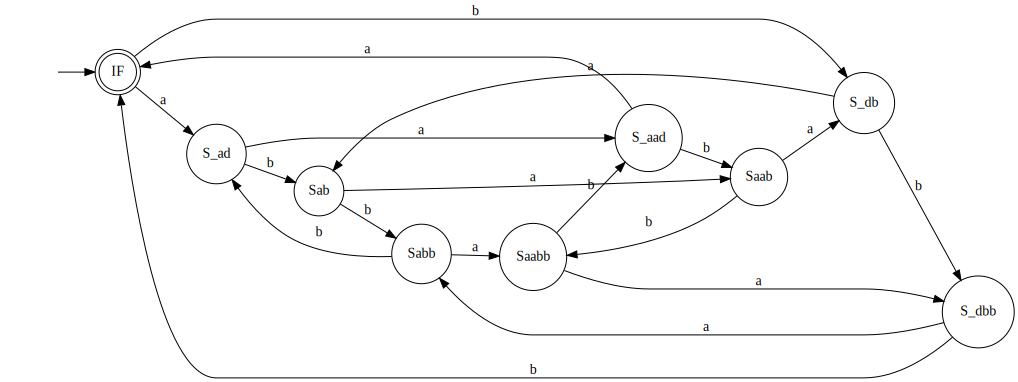

In [3]:
dotObj_dfa(i_jDivisibleByThree)

## From Languages to Regular Languages

We will now study __regular languages__. 

L is a regular language if L has a DFA. 

L is a regular language if there is a DFA D such that D accepts *all* and *only* those strings in L.

## DFA as Graphs: Define Regular Languages

DFA drawings are graphs. A string w is in a DFA D's language if there is a path from the initial state to *a* final state of D labeled by w.

## DFA as Symbol and String Transition Functions

A DFA is a quintuple $(Q, \Sigma, \delta, q_0, F)$. Its Python encoding looks as below.

In [4]:
Fig34 = {
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'q0': 'I',
 'F': {'F'}
}

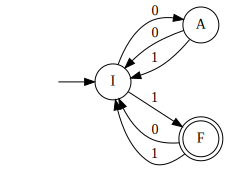

In [5]:
dotObj_dfa(Fig34)

## A prettier diagram is obtained by fusing edges

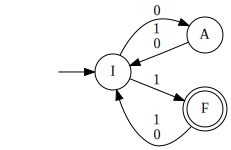

In [6]:
dotObj_dfa(Fig34, FuseEdges=True)

# The same DFA in automd (Jove's markdown)

Study Overview_Of_CS3100_Fall2020/ and its contents to fully learn how to define a DFA via a markdown.
You can study the animation panel which also explains the markdown syntax fully.


In [7]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


In [8]:
Fig34md = '''  !! Comments begin with !! and last till the end of line
DFA            !! This keyword tells "md2mc" that it is parsing a DFA
I : 0     -> A !! DFA transition: From initial state I, upon 0, go to state A
A : 0 | 1 -> I !! Two DFA transitions: from A, upon 0 or a 1, go to state I
I : 1     -> F !! A DFA transition from I to F. I is the initial state and F is final 
F : 0 | 1 -> I !! From F upon 0 or a 1, go to I.
'''

In [9]:
DFA1 = md2mc('''DFA

I : 0   -> A
A : 0|1 -> I
I : 1   -> F
F : 0|1 -> I

''')

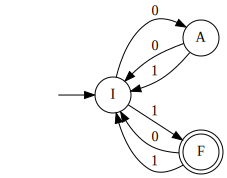

In [10]:
dotObj_dfa(DFA1)

In [11]:
step_dfa(DFA1, 'I', '0')

'A'

In [12]:
run_dfa(DFA1, '01100101')

'I'

In [13]:
run_dfa(DFA1, '011001011')

'F'

# Function md2mc is your automd compiler

In [14]:
Fig34MC = md2mc(Fig34md)
Fig34MC

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

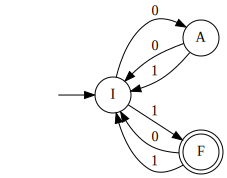

In [15]:
# md2mc alone produces a dict similar to Fig34, above.
# We pass it to dotObj_dfa which prints the DFA image,
# as shown below.

dotObj_dfa(md2mc(Fig34md))

In [16]:
accepts_dfa(md2mc(Fig34md), "10101")

True

# Testing acceptance in one "go"

Generating multiple strings according to the numeric order (increasing
lengths, with each length category exhausted before going to the next 
length category) is a handy test-input generator.

Plus, the "numeric order" is a powerful concept which we shall use 
when we later discuss the "dovetail enumeration" order (in Chapter 14
and beyond).


In [17]:
from math import floor, log, pow
def nthnumeric(N, S=['0','1']):
    """Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].    
    """
    assert(type(S)==list # This makes sure that the order does not flip
          ),"nthnumeric now expects to be given a two-element list!!" 
    assert(len(S)==2
          ),"Expected to be given an S of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

In [18]:
[ nthnumeric(i) for i in range(20) ]

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100']

# Now one can write a test loop

We plow thru the first 20 numeric-order listed strings,
and test for acceptance.


In [19]:
for s in [ nthnumeric(i) for i in range(20) ]:
    if accepts_dfa(md2mc(Fig34md), s):
        print("Fig34md DFA accepts ", s)
    else:
        print("Fig34md DFA does not accept ", s)

Fig34md DFA does not accept  
Fig34md DFA does not accept  0
Fig34md DFA accepts  1
Fig34md DFA does not accept  00
Fig34md DFA does not accept  01
Fig34md DFA does not accept  10
Fig34md DFA does not accept  11
Fig34md DFA does not accept  000
Fig34md DFA accepts  001
Fig34md DFA does not accept  010
Fig34md DFA accepts  011
Fig34md DFA does not accept  100
Fig34md DFA accepts  101
Fig34md DFA does not accept  110
Fig34md DFA accepts  111
Fig34md DFA does not accept  0000
Fig34md DFA does not accept  0001
Fig34md DFA does not accept  0010
Fig34md DFA does not accept  0011
Fig34md DFA does not accept  0100


# Now, simply run the cells, use help

Run the cell contents. At any time if you have a doubt about
some function, say "foo", run the "help(foo)" command. Also
refer to Appendix B of our book for a complete explanation of
all the Jove functions.


In [20]:
Fig34MC = md2mc(Fig34md)
Fig34MC

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [21]:
is_partially_consistent_dfa(Fig34MC)

True

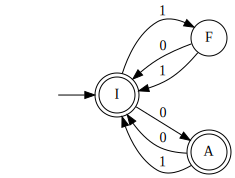

In [22]:
dotObj_dfa_w_bh(comp_dfa(Fig34MC))

In [23]:
ev0 = md2mc('''
DFA
IF : 0 -> A
A  : 0 -> IF
''')

In [24]:
ev0

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0'},
 'q0': 'IF'}

In [25]:
dev0 = dotObj_dfa(ev0)

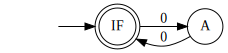

In [26]:
dev0

# You can generate PDF out of a DFA

This is one way to "print" a DFA as PDF. There are 
a few more such commands tucked away within Jupyter.


In [27]:
# Generate a PDF this way
dev0.render('dev0')

'dev0.pdf'

# Poke a DFA, add to its Sigma

You can expand the Sigma of a DFA later on. Then
if you totalize the DFA, you will see black-hole
states emerging. The newly added symbols lead to
the Black hole states, as shown below.


In [28]:
ev0_bh =  addtosigma_dfa(ev0, set({'1'}))

In [29]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [30]:
ev0_bh_totalize = totalize_dfa(ev0_bh)

In [31]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [32]:
do_ev0_tot = dotObj_dfa_w_bh(ev0_bh_totalize)

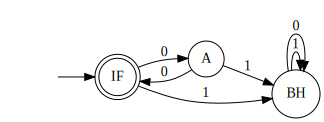

In [33]:
do_ev0_tot

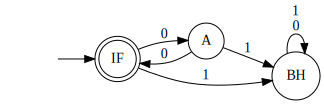

In [34]:
dotObj_dfa_w_bh(ev0_bh_totalize, FuseEdges=True)

<span style="color:blue"> **We can now write routines to print DFA using dot. The main routines are listed below.** </span>

* dot_dfa_w_bh : lists all states of a DFA including black-hole states
* dot_dfa      : lists all isNotBH states (see below for a defn), i.e. suppress black-holes
     - Usually there are too many transitions to them and that clutters the view
     

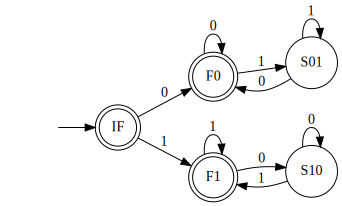

In [35]:
dfaBESame = md2mc('''
DFA !! Begins and ends with same; epsilon allowed
IF  : 0 -> F0
IF  : 1 -> F1
!!
F0  : 0 -> F0
F0  : 1 -> S01
S01 : 1 -> S01
S01 : 0 -> F0
!!
F1  : 1 -> F1
F1  : 0 -> S10
S10 : 0 -> S10
S10 : 1 -> F1
''')
DOdfaBESame = dotObj_dfa(dfaBESame)
DOdfaBESame

## Let us now administer some tests to print dot-strings generated.

We will demonstrate two ways to print automata: 

1. First generate a dot string via dot_dfa or dot_dfa_w_bh
   (calling the result "dot_string") 
   1. Then use the srcObj = Source(dot_string) call
   2. Thereafter we can display the srcObj object directly into the browser
   3. Or, one can also later convert the dot_string to svg or PDF
2. OR, one can directly generate a dot object via the dotObj_dfa or dotObj_dfa_w_bh call
   (calling the result "dot_object")
   1. Then directly display the dot_object
   2. There are conversions available for dot_object to other formats too

# One can read DFAs from files

In [36]:
dped1 = md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/pedagogical1.dfa")
#machines/dfafiles/pedagogical1.dfa

FileNotFoundError: ignored

In [ ]:
dped1

In [ ]:
dotObj_dfa(dped1)

In [ ]:
dotObj_dfa(dped1, FuseEdges=True)

In [ ]:
ends0101 = md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/endsin0101.dfa")

In [ ]:
dotObj_dfa(ends0101)

In [ ]:
thirdlastis1=md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/thirdlastis1.dfa")
#machines/dfafiles/thirdlastis1.dfa

In [ ]:
thirdlastis1

In [ ]:
dotObj_dfa(thirdlastis1)

In [ ]:
dped1=md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/pedagogical2.dfa")
#machines/dfafiles/pedagogical2.dfa

In [ ]:
dotObj_dfa(dped1)

In [ ]:
secondLastIs1 = md2mc('''
!!------------------------------------------------------------
!! This DFA looks for patterns of the form ....1.
!! i.e., the second-last (counting from the end-point) is a 1
!!
!! DFAs find such patterns "very stressful to handle",
!! as they are kept guessing of the form  'are we there yet?'
!! 'are we seeing the second-last' ?
!! They must keep all the failure options at hand. Even after
!! a 'fleeting glimpse' of the second-last, more inputs can
!! come barreling-in to make that "lucky 1" a non-second-last.
!!
!! We take 7 states in the DFA solution.
!!------------------------------------------------------------

DFA
!!------------------------------------------------------------
!! State : in ->  tostate !! comment
!!------------------------------------------------------------

I   :  0 ->  S0  !! Enter at init state I
I   :  1 ->  S1  !! Record bit seen in state letter
                     !! i.e., S0 means "state after seeing a 0"
			 
S0  :  0 ->  S00 !! continue recording input seen
S0  :  1 ->  S01 !! in state-letter. This is a problem-specific
                 !! way of compressing the input seen so far.

S1  :  0 ->  F10 !! We now have a "second last" available!
S1  :  1 ->  F11 !! Both F10 and F10 are "F" (final)

S00 :  0 ->  S00 !! History of things seen is still 00
S00 :  1 ->  S01 !! Remember 01 in the state

S01 :  0 ->  F10 !! We again have a second-last of 1
S01 :  1 ->  F11 !! We are in F11 because of 11 being last seen

F10 :  0 ->  S00 !! The second-last 1 gets pushed-out
F10 :  1 ->  S01 !! The second-last 1 gets pushed-out here too

F11 :  0 ->  F10 !! Still we have a second-last 1
F11 :  1 ->  F11 !! Stay in F11, as last two seen are 11

!!------------------------------------------------------------
''')

In [ ]:
nthnumeric(20,['0','1'])

In [ ]:
run_dfa(secondLastIs1, '0101')

In [ ]:
accepts_dfa(secondLastIs1, '0101')

In [ ]:
tests = [ nthnumeric(i, ['0','1']) for i in range(12) ]
for t in tests:
    if accepts_dfa(secondLastIs1, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

In [ ]:
help(run_dfa)

In [ ]:
dfaOdd1s = md2mc('''
DFA
I : 0 -> I
I : 1 -> F
F : 0 -> F 
F : 1 -> I
''')

In [ ]:
dotObj_dfa(dfaOdd1s)

## Define a DFA for "ends in 01"

In [ ]:
ends01 = md2mc('''
DFA 
I     : 1 -> I   !! idle at I
I     : 0 -> S0  !! record 0 seen
 
S0    : 0 -> S0  !! stay at S0, hopeful of a 1
S0    : 1 -> F   !! Found 01

F     : 0 -> S0  !! Broke ending, but S0 is the fall back
F     : 1 -> I   !! Must resume finding another 0
''')

In [ ]:
dotObj_dfa(ends01)

## Now produce a DFA for the union

Union of "odd 1s" and "ends in 01"


In [ ]:
odd1sORends01 = union_dfa(dfaOdd1s,ends01)

In [ ]:
dotObj_dfa(odd1sORends01)

## Apply DFA minimization

In [ ]:
Minodd1sORends01 = min_dfa(odd1sORends01)

In [ ]:
dotObj_dfa(Minodd1sORends01)

## Minimization vs. Isomorphism vs. Lang. Eql.

After minimization, we may not have isomorphic DFA, but we 
will have language-equivalent DFA

In [ ]:
iso_dfa(odd1sORends01, Minodd1sORends01)

In [ ]:
langeq_dfa(odd1sORends01, Minodd1sORends01)

# We can now find out which states were eliminated upon minimization

In [ ]:
odd1sORends01["Q"] - Minodd1sORends01["Q"]

## The reason why these states got eliminated is as follows (taking F_F as an example)

* F_F and F_I are indistinguishable by any string! We can study any string from these states and we see that their end states are the same

* Now study the minimization algorithm from the book and know how to write solutions to assignments based on that understanding

## Now define "odd 1s" AND "ends in 01"

Define the and of these machines and minimize it

In [ ]:
odd1sANDends01 = intersect_dfa(dfaOdd1s,ends01)

In [ ]:
dotObj_dfa(odd1sANDends01)

In [ ]:
Minodd1sANDends01 = min_dfa(odd1sANDends01)

In [ ]:
dotObj_dfa(Minodd1sANDends01)

## Now, complement the individual machines

In [ ]:
CdfaOdd1s = comp_dfa(dfaOdd1s)

In [ ]:
Cends01 = comp_dfa(ends01)

## Complement of the union of the complements

The complement of the union of the complements of M1 and M2 is of course the intersection of M1 and M2! Let us check that!


In [ ]:
C_CdfaOdd1sORCends01 = comp_dfa(union_dfa(CdfaOdd1s, Cends01))

In [ ]:
dotObj_dfa(C_CdfaOdd1sORCends01)

In [ ]:
MinC_CdfaOdd1sORCends01 = min_dfa(C_CdfaOdd1sORCends01)

## Minimized Comp(CdfaOdd1s OR Cends01)

This will now pass the isomorphism check, below


In [ ]:
dotObj_dfa(MinC_CdfaOdd1sORCends01)

## DeMorgan's Law works for DFA !!

The same machine, when obtained through two routes, turn out to be isomorphic when minimized


In [ ]:
iso_dfa(MinC_CdfaOdd1sORCends01, Minodd1sANDends01)

# These are some examples from the book

In [ ]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [ ]:
dblimp = dotObj_dfa(blimp)

In [ ]:
dblimp

In [ ]:
dblimp = dotObj_dfa(blimp, FuseEdges=True)

In [ ]:
dblimp

In [ ]:
mblimp = min_dfa(blimp)

In [ ]:
dmblimp = dotObj_dfa(mblimp)

In [ ]:
dmblimp


## ASSIGNMENT 3

FA1 = aa as a substring
FA2 = Even number of a and b
FA3 = Union of FA1 and FA2



# FA1 and FA2 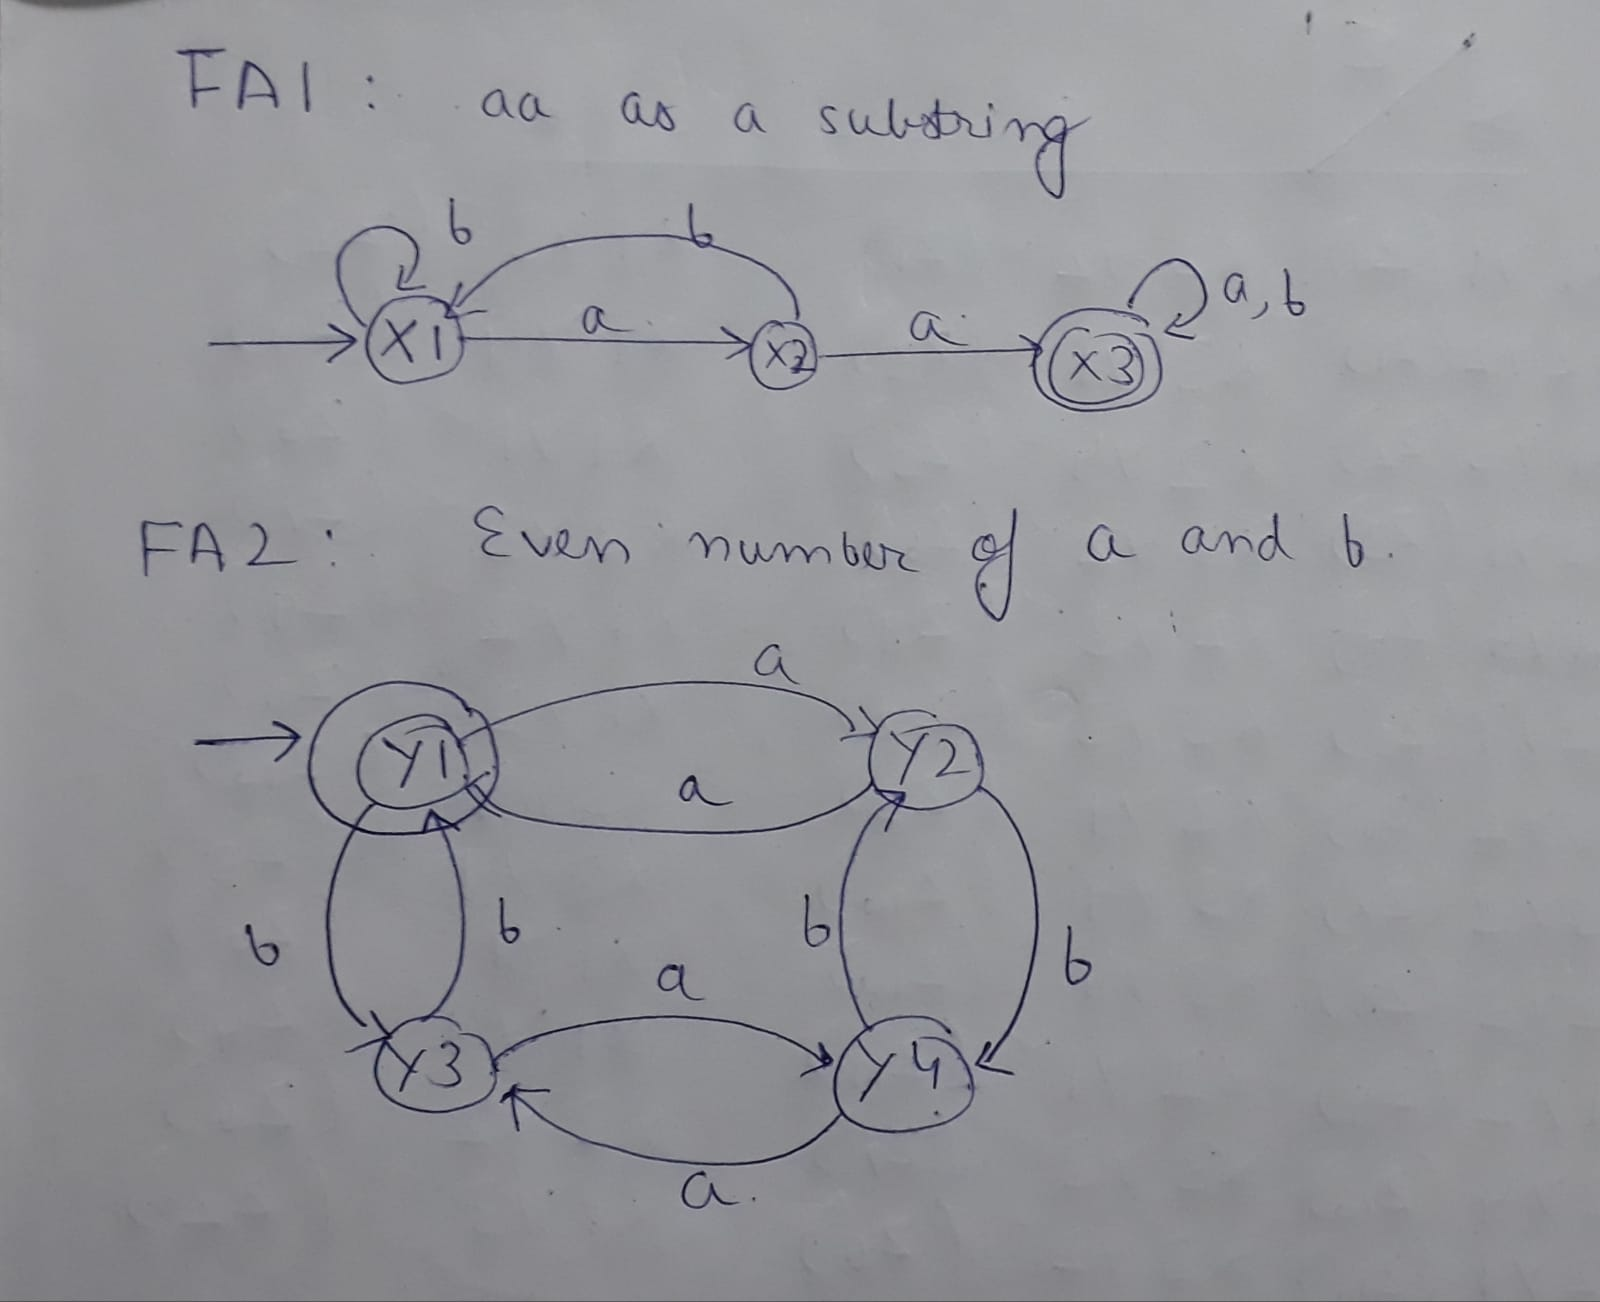

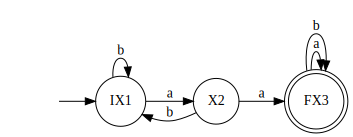

In [41]:
FA1 = md2mc('''DFA

IX1 : a -> X2
IX1 : b -> IX1

X2 : b -> IX1
X2 : a -> FX3

FX3 : a -> FX3
FX3 : b -> FX3

''')

dotObj_dfa(FA1)




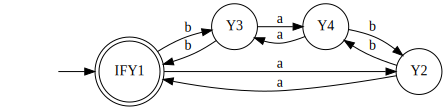

In [42]:
FA2 = md2mc('''DFA

IFY1 : a -> Y2
Y2 : a -> IFY1

Y2 : b -> Y4
Y4 : b -> Y2

Y4 : a -> Y3
Y3 : a -> Y4

Y3 : b -> IFY1
IFY1 : b -> Y3

''')

dotObj_dfa(FA2)

Transition table of FA3 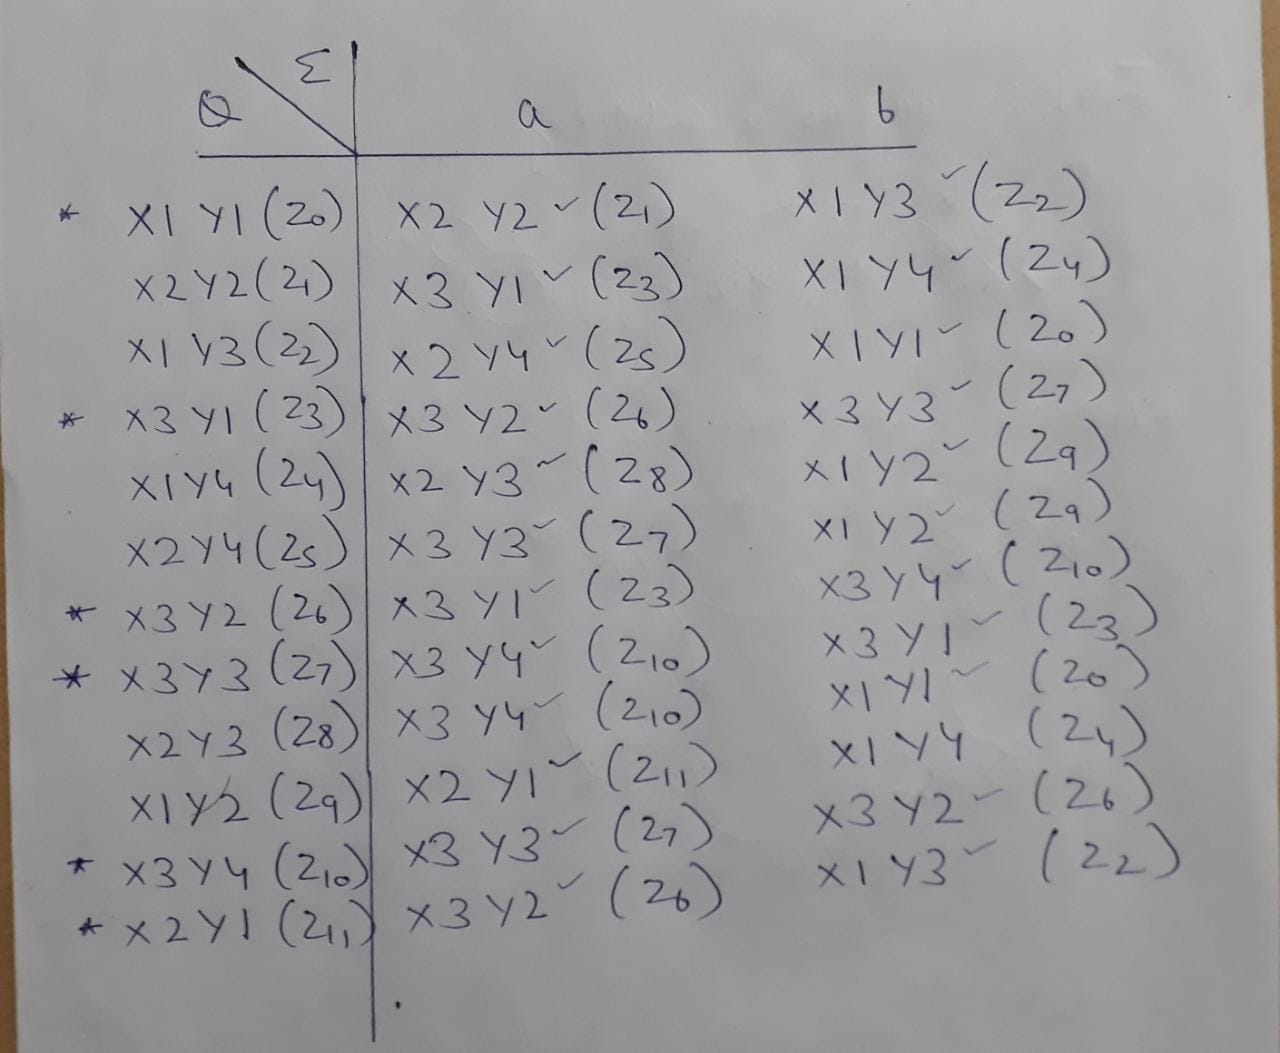

Union of FA1 and FA2 -> FA3 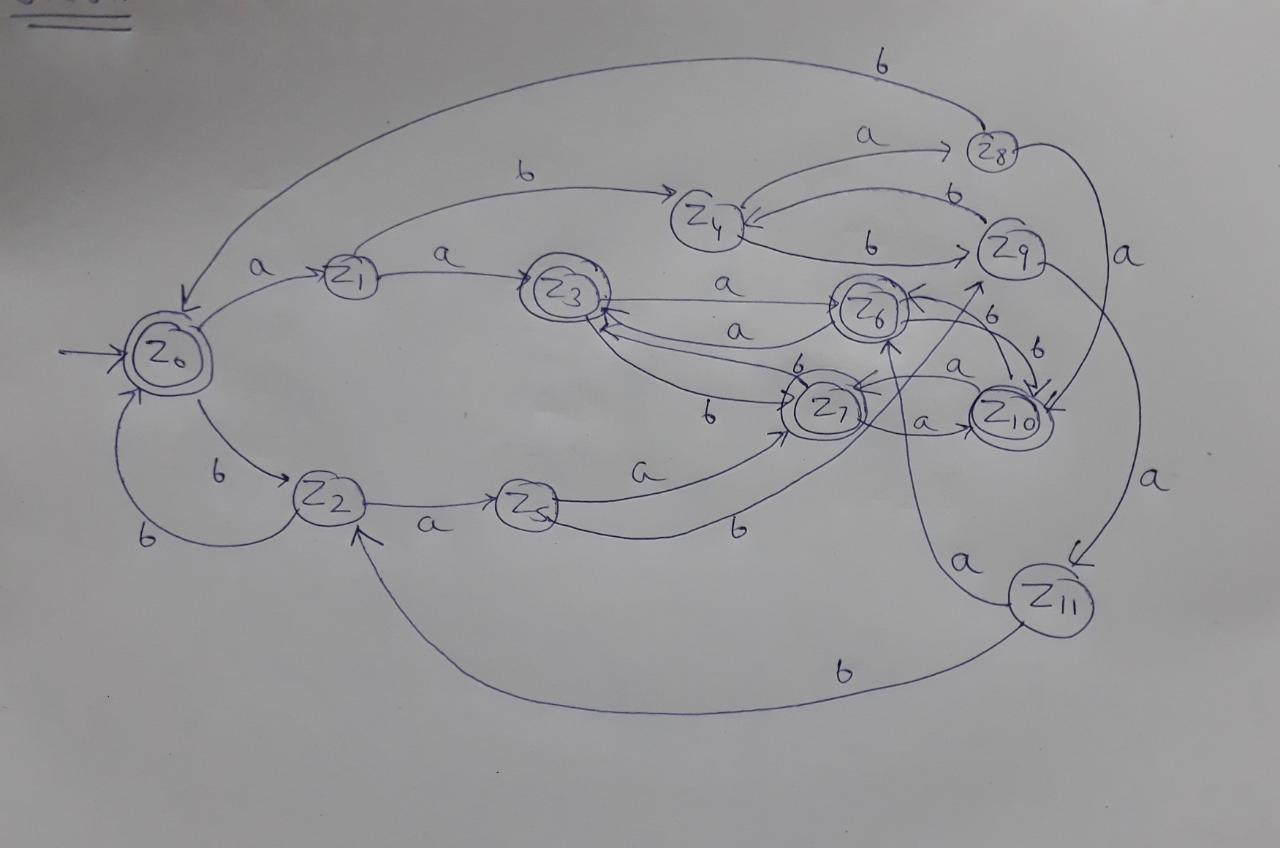

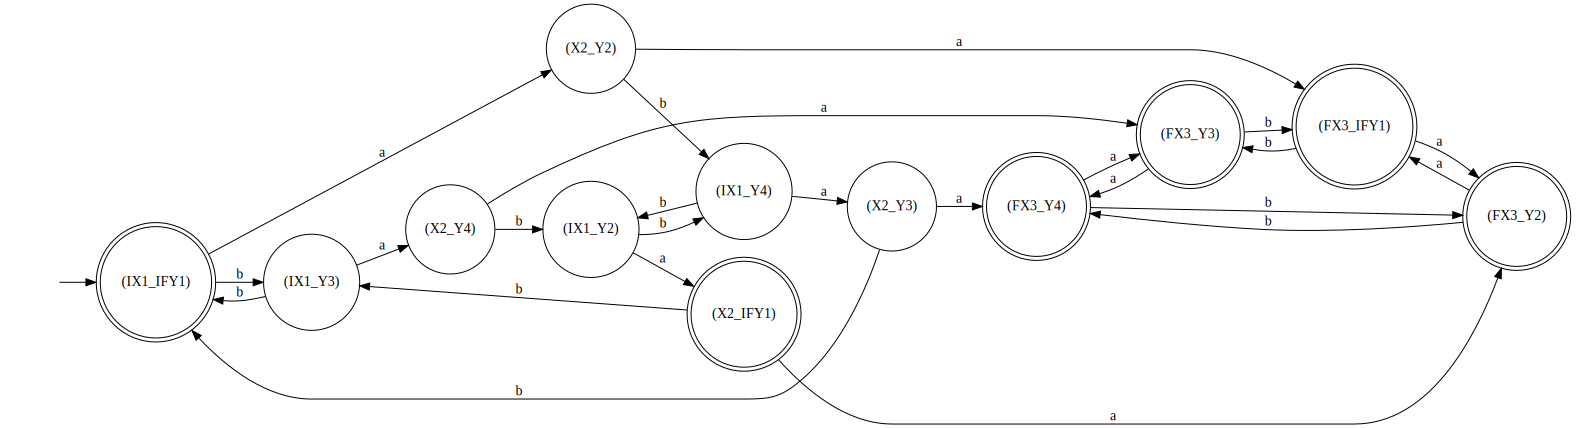

In [43]:
FA3 = union_dfa(FA1,FA2)
dotObj_dfa(FA3)